In [1]:
import os
import skimage as sk
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import erosion, dilation
from skimage.measure import find_contours
from skimage import measure
import numpy as np
import napari
import tifffile as tiff
# import torchio as tio
import SimpleITK as sitk # for nii.gz
import seaborn as sns
import pandas as pd

In [19]:
# path_raw = '../data/nucleus/images_manual'
# path_my = '../data/nucleus/masks_manual'
# path_so = '/home/gumougeot/all/data/3d_nucleus/all_manual/masks_sophie'
# path_njgift = '/home/gumougeot/all/data/OMERO_FSU/#3d NUCLEAR MORPHOLOGY - SEGMENTED/GIFT'
# path_njotsu = '/home/gumougeot/all/data/OMERO_FSU/#3d NUCLEAR MORPHOLOGY - SEGMENTED/OTSU'

# path_raw = '/home/gumougeot/all/codes/python/self-supervised-3d-tasks/nucleus/test/img'
# list_names=["lab", "supervised", "self"]
# paths_lab = [
#     '/home/gumougeot/all/codes/python/self-supervised-3d-tasks/nucleus/test/img_labels',
#     '/home/gumougeot/all/codes/python/self-supervised-3d-tasks/nucleus/test/pred_rnd_nucleus/',
#     '/home/gumougeot/all/codes/python/self-supervised-3d-tasks/nucleus/test/pred_finetune/',
# ]

# path_raw = "/home/gumougeot/all/data/3d_nucleus/all_manual/images_resampled_sophie"
# list_names = ["gt", "pred"]
# paths_lab = [
#     '/home/gumougeot/all/data/3d_nucleus/all_manual/masks_resampled_sophie',
#     '/home/gumougeot/all/data/3d_nucleus/all_manual/pred_gui',
# ]

# path_raw = "/home/gumougeot/all/data/3d_nucleus/remi/selection_col_cotA"
# path_raw = "/home/gumougeot/all/data/3d_nucleus/remi/img"
# path_raw = "/home/gumougeot/all/data/3d_nucleus/remi/to_pred_nucleus/selection_HIRA_cotB/"
# list_names = ["pred", "gt"]
# list_names = ["pred"]
# paths_lab = [
#     '/home/gumougeot/all/data/3d_nucleus/remi/selection_col_cotA_pred',
#     '/home/gumougeot/all/data/3d_nucleus/remi/pred',
#     '/home/gumougeot/all/data/3d_nucleus/remi/pred_nucleus/selection_HIRA_cotB/',
#     '/home/gumougeot/all/data/3d_nucleus/remi/label',
# ]

# path_raw = '/home/gumougeot/all/data/Task07_Pancreas/tif_test_img'
# list_names=["lab", 
#     '/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_4',
#     '/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_5',
#     '/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_6',
#            ]
# paths_lab = [
#     '/home/gumougeot/all/data/Task07_Pancreas/tif_test_img_labels',
# #     '/home/gumougeot/all/data/Task07_Pancreas/pred_rdn_1',
# #     '/home/gumougeot/all/data/Task07_Pancreas/pred_rdn_2',
# #     '/home/gumougeot/all/data/Task07_Pancreas/pred',
# #     '/home/gumougeot/all/data/Task07_Pancreas/pred_rpl_1',
#     '/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_4',
#     '/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_5',
#     '/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_6',
# ]
# paths_lab = ['/home/gumougeot/all/data/Task07_Pancreas/tif_test_img_labels']
# list_names = ["lab"]
# for i in range(17,24):
#     paths_lab += ['/home/gumougeot/all/data/Task07_Pancreas/pred_rnd_'+str(i)]
#     list_names += ["supervised_"+str(i)]

# path_my = '../data/nucleus/masks_manual'
# path_so = '/home/gumougeot/all/data/3d_nucleus/all_manual/masks_sophie'
# path_njgift = '/home/gumougeot/all/data/OMERO_FSU/#3d NUCLEAR MORPHOLOGY - SEGMENTED/GIFT'
# path_njotsu = '/home/gumougeot/all/data/OMERO_FSU/#3d NUCLEAR MORPHOLOGY - SEGMENTED/OTSU'

# path_raw = "D:\\data\\benchmark\\medical\\lung\\test\\img"
# list_names = ["lab", "pred"]
# paths_lab = [
#     "D:\\data\\benchmark\\medical\\lung\\test\\msk",
#     "D:\\data\\benchmark\\medical\\lung\\test\\method_adaptations\\biome3d\\20220808-100705-unet_mine-lung",
# ]

path_raw = "/home/gumougeot/all/data/3d_nucleus/nnunet_pred/imagesTs"
list_names = ["lab", "pred"]
paths_lab = [
    "/home/gumougeot/all/data/3d_nucleus/nnunet_pred/labelsTs",
    "/home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0",
]


In [20]:
def abs_path(root, listdir_):
    listdir = listdir_.copy()
    for i in range(len(listdir)):
        listdir[i] = os.path.join(root, listdir[i])
    return listdir

def abs_listdir(path):
    return abs_path(path, os.listdir(path))

def remove_begin(pattern, listdir_):
    listdir = listdir_.copy()
    for i in range(len(listdir)):
        listdir[i] = listdir[i][str.find(listdir[i],pattern):]
    return listdir

def plot3d(img_list, dpi=300):
    plt.figure(dpi=dpi)
    for i in range(len(img_list)):
        img = img_list[i]
        idx = len(img)//2
        plt.subplot(1,len(img_list),i+1)
        plt.imshow(img[idx])
    plt.show()

In [21]:
# # start with sophie's
# fname_so = os.listdir(path_so)

# abs_so = abs_path(path_so, fname_so)
# print("number of images ", len(abs_so))

# # need to remove the beginning of the filenames
# fname_so_no_begin = fname_so.copy()
# abs_my = abs_path(path_my, fname_so_no_begin)
# abs_raw = abs_path(path_raw, fname_so_no_begin)
# abs_njgift = abs_path(path_njgift, fname_so_no_begin)
# abs_njotsu = abs_path(path_njotsu, fname_so_no_begin)

# # the list below contains all the path in the following order:
# # 1. sophie
# # 2. mine
# # 3. gift
# # 4. otsu
# # 5. the original image
# list_abs = [abs_so, abs_my, abs_njgift, abs_njotsu, abs_raw]

In [24]:
list_abs = [abs_listdir(p) for p in paths_lab] + [abs_listdir(path_raw)]
assert sum([len(t) for t in list_abs])%len(list_abs)==0, [len(t) for t in list_abs]

In [23]:
# plot the images
# idx = 3
# for i in range(len(list_abs)-1):
#     path_img = list_abs[i][idx]
#     img = imread(path_img)
#     img = (img > 0).astype(int)
#     print(list_names[i], img.shape)
#     img = img[len(img)//2]
    
#     plt.subplot(1,len(list_abs)-1,i+1)
#     plt.imshow(img)

In [7]:
# forms quadruplets

# list_abs_ = []
# for i in range(len(abs_so)):
#     list_abs_ += [[elmt[i] for elmt in list_abs]]
# print(len(list_abs_))
# list_abs_ = np.array(list_abs).T
# list_abs_.shape

In [25]:
# metric definition
def iou(inputs, targets, smooth=1):
    inter = (inputs & targets).sum()
    union = (inputs | targets).sum()
    return (inter+smooth)/(union+smooth)

def dice(inputs, targets, smooth=1):   
    inter = (inputs & targets).sum()                           
    dice = (2.*inter + smooth)/(inputs.sum() + targets.sum() + smooth)  
    return dice

def bce(inputs, targets, smooth=1e-7):
    y_pred = np.reshape(inputs, -1)
    y_true = np.reshape(targets, -1)
    y_pred = np.clip(y_pred, smooth, 1 - smooth)
    term_0 = (1-y_true) * np.log(1-y_pred + smooth)
    term_1 = y_true * np.log(y_pred + smooth)
    return -np.mean(term_0+term_1, axis=0)

In [26]:
def iou_border_erosion(inputs, targets, smooth=1):
    bor_in = erosion(inputs) ^ inputs
    bor_tg = erosion(targets) ^ targets
    return iou(bor_in, bor_tg)

def iou_border_dilation(inputs, targets, smooth=1):
    bor_in = dilation(inputs) ^ inputs
    bor_tg = dilation(targets) ^ targets
    return iou(bor_in, bor_tg)

def iou_in_and_border(inputs, targets, smooth=1):
    bor_in = erosion(inputs) ^ inputs
    bor_tg = erosion(targets) ^ targets
    all_in = np.stack([inputs, bor_in], axis=0)
    all_tg = np.stack([targets, bor_tg], axis=0)
    return iou(all_in,all_tg)

def iou_border_thick(inputs, targets, smooth=1):
    bor_in = erosion(inputs) ^ dilation(inputs)
    bor_tg = erosion(targets) ^ dilation(targets)
    return iou(bor_in, bor_tg)

In [27]:
# test
# m = np.array([[0,1,0.5],
#               [1,0,1],
#               [1,1,0]])
# print(iou(m,m))

# sophie vs mine on one image
# idx = 0
# path_vs = list_abs_[idx]
# img1 = imread(path_vs[0])
# img1 = (img1 > 0).astype(int)
# img2 = imread(path_vs[3])
# img2 = (img2 > 0).astype(int)
# print(iou(img1,img2,smooth=1))

# plot3d([img1,img2],dpi=100)

# intersection = (img1 & img2)
# bor_in = erosion(img1) ^ img1
# bor_tg = erosion(img2) ^ img2
# bor_in = erosion(img1) ^ dilation(img1)
# bor_tg = erosion(img2) ^ dilation(img2)
# bor_in = img1 ^ dilation(img1)
# bor_tg = img2 ^ dilation(img2)

# plot3d([bor_in,bor_tg])



In [28]:
# use find contour function? No version for 3D... 
# img1 = imread(path_vs[0])
# im = img1[len(img1)//2]

## with skimage
# contours = find_contours(im)
# print(contour[0].shape)

## with cv2
# im = np.stack([im,im,im],-1)
# plt.imshow(im)
# plt.show()
# imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# contour, hierarchy = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(contour[0].shape)

## plot contours
# def contour_to_img(contour, shape):
#     out = np.zeros(shape)
#     for i in range(len(contour)):
#         x = contour[i][0][0]
#         y = contour[i][0][1]
#         out[y][x] = 1
#     return out
# plt.figure(dpi=200)
# out = contour_to_img(contour[0], im.shape)
# plt.imshow(out)

In [29]:
def one_hot(values, num_classes=None):
    if num_classes==None:
        n_values = np.max(values) + 1
    else:
        n_values = num_classes
#     print(n_values.shape)
    out = np.eye(n_values)[values]
    out = np.moveaxis(out, -1, 0)
    return out

# print(imread(list_abs[1][0]).shape)
# print(one_hot(imread(list_abs[1][0])).shape)

def dist_vec(v1,v2):
    """
    euclidean distance between two vectors (np.array)
    """
    v = v2-v1
    return np.sqrt(np.sum(v*v))

def center(labels, idx):
    """
    return the barycenter of the pixels of label = idx
    """
    dim = labels.shape
    
    # matrix of coordinate with the same size as labels
    x, y, z = np.meshgrid(np.arange(dim[1]),np.arange(dim[0]), np.arange(dim[2]))
    out = np.stack((y,x,z))
    out = np.transpose(out, axes=(1,2,3,0))
    
    # extract the barycenter
    return np.mean(out[labels==idx], axis=0)

def closest(labels, num):
    """
    return the index of the object the closest to the center of the image.
    num: number of label in the image (background does not count)
    """
    labels_center = np.array(labels.shape)/2
    centers = [center(labels,idx+1) for idx in range(num)]
    dist = [dist_vec(labels_center,c) for c in centers]
    return np.argmin(dist)+1

def keep_center_only(msk):
    """
    return mask (msk) with only the connected component that is the closest 
    to the center of the image.
    """
    labels, num = measure.label(msk, background=0, return_num=True)
    close_idx = closest(labels,num)
    return (labels==close_idx).astype(msk.dtype)*255

In [30]:
def sitk_imread(img_path):
    """
    convert nifti format (.nii.gz) to numpy array
    """
    img = sitk.ReadImage(img_path)
    img_np = sitk.GetArrayFromImage(img)
    return img_np

def adaptive_imread(img_path):
    """
    use skimage imread or sitk imread depending on the file extension:
    .tif --> skimage.io.imread
    .nii.gz --> SimpleITK.imread
    """
    extension = img_path[img_path.rfind('.'):]
    if extension == ".tif":
        return imread(img_path)
    else:
        return sitk_imread(img_path)

def versus(fct, list_abs1,list_abs2, num_classes=None, single_class=None):
    """
    Computes the function 'fct' over the whole list_abs1 and list_abs2
    args:
        -num_classes: [int] number of classes in the images (number of channels)
        -single_class: [int] if not None, used to select one of the predicted classes.
        must be smaller than the number of classes.
    """
    mean = 0
    count = 0
    for i in range(len(list_abs1)):
        img1 = adaptive_imread(list_abs1[i])
        img1 = one_hot(img1, num_classes)[...,1:]
        if single_class is not None:
            img1 = img1[...,single_class]
#         img1 = keep_center_only(img1)
        img1 = (img1 > 0).astype(int)
    
        img2 = adaptive_imread(list_abs2[i])
        img2 = one_hot(img2, num_classes)[...,1:]
        if single_class is not None:
            img2 = img2[...,single_class]
#         img2 = keep_center_only(img2)
        img2 = (img2 > 0).astype(int)

        if sum(img1.shape)!=sum(img2.shape):
            print("bug:sum(img1.shape)!=sum(img2.shape):", list_abs1[i], list_abs2[i])
            print("img1.shape", img1.shape)
            print("img2.shape", img2.shape)
            pass
        else:
            out = fct(img1,img2)
#             if out!=1:
#                 print(out)
#                 print(i)
#                 print(list_abs1[i])
#                 print(list_abs2[i])
            mean += out
            
            count += 1
    return mean / count

def versus_one(fct, in_path, tg_path, num_classes, single_class=None):
    img1 = adaptive_imread(in_path)
    print("in_path",in_path)
    if len(img1.shape)==3:
        img1 = one_hot(img1, num_classes)[1:,...]
    if single_class is not None:
#         img1 = img1[...,single_class]
        img1 = img1[single_class,...]
    img1 = (img1 > 0).astype(int)
    
    img2 = adaptive_imread(tg_path)
    print("tg_path",tg_path)
    if len(img2.shape)==3:
        img2 = one_hot(img2, num_classes)[1:,...]
    if single_class is not None:
#         img2 = img2[...,single_class]
        img2 = img2[single_class,...]
    img2 = (img2 > 0).astype(int)
    

    print("img1.shape", img1.shape)
    print("img2.shape", img2.shape)
    if sum(img1.shape)!=sum(img2.shape):
        print("bug:sum(img1.shape)!=sum(img2.shape):")
        print("img1.shape", img1.shape)
        print("img2.shape", img2.shape)
        return
    out = fct(img1, img2)
    return out

def versus_all_sophie(versus, fct, list_abs):
    """
    use the "versus" function to apply the "fct" function over the 
    different elements in list "list_abs".
    """
    print("sophie vs mine", versus(fct, list_abs[0], list_abs[1]))
    print("sophie vs gift", versus(fct, list_abs[0], list_abs[2]))
    print("sophie vs otsu", versus(fct, list_abs[0], list_abs[3]))

    print("mine vs gift", versus(fct, list_abs[1], list_abs[2]))
    print("mine vs otsu", versus(fct, list_abs[1], list_abs[3]))

    print("otsu vs gift", versus(fct, list_abs[2], list_abs[3]))

def versus_all(versus, fct, list_abs, list_names=None):
    """
    use the "versus" function to apply the "fct" function over the 
    different elements in list "list_abs".
    """
    if list_names is None:
        list_names = ['lab_{}'.format(i) for i in range(len(list_abs)-1)]
    for i in range(len(list_abs)-1):
        for j in range(i):
            print("{} vs {}:".format(list_names[i], list_names[j]), versus(fct, list_abs[i], list_abs[j]))

def one_versus_all(versus, fct, list_abs, list_names=None, num_classes=None, single_class=None):
    """
    use the "versus" function to apply the "fct" function over the 
    different elements in list "list_abs" .
    one vs all is the comparison between the label and the rest of the images
    """
#     if list_names is None:
#         list_names = ['lab_{}'.format(i) for i in range(len(list_abs)-1)]
    for i in range(1,len(list_abs)-1):
        print("{} vs {}:".format(list_names[0], list_names[i]), versus(fct, list_abs[0], list_abs[i], num_classes, single_class))

In [31]:
msk=adaptive_imread(list_abs[0][0])
msk.shape

(73, 148, 133)

In [32]:
results = []
for idx in range(len(list_abs[0])):
    print(list_abs[1][idx])
    results += [versus_one(fct=dice, in_path=list_abs[1][idx], tg_path=list_abs[0][idx], num_classes=3, single_class=None)]
    print(results[-1])

# one_versus_all(versus, dice, list_abs, list_names=list_names, num_classes=3, single_class=0)

/home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0/Nucleus_014.nii.gz
in_path /home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0/Nucleus_014.nii.gz
tg_path /home/gumougeot/all/data/3d_nucleus/nnunet_pred/labelsTs/Nucleus_014.nii.gz
img1.shape (2, 73, 148, 133)
img2.shape (2, 73, 148, 133)
0.9579239202552842
/home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0/Nucleus_085.nii.gz
in_path /home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0/Nucleus_085.nii.gz
tg_path /home/gumougeot/all/data/3d_nucleus/nnunet_pred/labelsTs/Nucleus_085.nii.gz
img1.shape (2, 57, 104, 107)
img2.shape (2, 57, 104, 107)
0.9122650375939849
/home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0/Nucleus_092.nii.gz
in_path /home/gumougeot/all/data/3d_nucleus/nnunet_pred/output_for_fold_0/Nucleus_092.nii.gz
tg_path /home/gumougeot/all/data/3d_nucleus/nnunet_pred/labelsTs/Nucleus_092.nii.gz
img1.shape (2, 37, 107, 111)
img2.shape (2, 37, 107, 111)
0.

In [16]:
results

[0.6086410997763352,
 0.6068796956270468,
 0.7157705668359485,
 0.629804999066343,
 0.7192430050327258,
 0.5095316408783471,
 0.6222538523423479,
 0.5858548017529034,
 0.5449532731530958,
 0.6981006299030027,
 0.6805022464220893,
 0.5655318720334395,
 0.5080103835460732,
 0.701927023698935,
 0.6190011087059817,
 0.3446893511502962,
 0.5037911719068109,
 0.4897295477101942,
 0.6356660505327962,
 0.6092246349480037,
 0.6061253363664105,
 0.5148274430367006,
 0.8315037282518641,
 0.7420419426048566,
 0.8303035811670605,
 0.670767592410952,
 0.6939972105241777,
 0.7074950824119921,
 0.5929971069081087,
 0.5655504721113599,
 0.7689148443203098,
 0.7908667476711219,
 0.7250996289679813,
 0.2975811296840407,
 0.7363419865627858,
 0.7534876537058812,
 0.7676552984165652,
 0.6236926249103514,
 0.32702583320271866,
 0.7490804721525416,
 0.640743771705895,
 0.6092917452250185,
 0.8270372840447154,
 0.4578962637228406,
 0.7114954123369445,
 0.46116795247328685,
 0.41265009867210756,
 0.70188771279

In [33]:
np.mean(results)

0.9266799667785188

In [15]:
# fct = iou_border_thick
# fct = iou
# print("sophie vs mine", versus(fct, list_abs[0], list_abs[1]))
# print("sophie vs gift", versus(fct, list_abs[0], list_abs[2]))
# print("sophie vs otsu", versus(fct, list_abs[0], list_abs[3]))

# print("mine vs gift", versus(fct, list_abs[1], list_abs[2]))
# print("mine vs otsu", versus(fct, list_abs[1], list_abs[3]))

# print("otsu vs gift", versus(fct, list_abs[2], list_abs[3]))


In [16]:
# temporary: store the file in folders

# from shutil import copyfile
# out_so = '/home/gumougeot/all/data/3d_nucleus/all_manual/eval_metrics/sophie/'
# out_gu = '/home/gumougeot/all/data/3d_nucleus/all_manual/eval_metrics/guillaume/'
# out_gi = '/home/gumougeot/all/data/3d_nucleus/all_manual/eval_metrics/gift/'
# out_ot = '/home/gumougeot/all/data/3d_nucleus/all_manual/eval_metrics/otsu/'
# list_out = [out_so, out_gu, out_gi, out_ot]

# # remove bugs
# bugs = ['/mnt/52547A99547A8011/data/raw mal seg/2018051_1527145113.736_Ath_Col0--KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_U1_7_C0.tif']
# bugs_idx = []
# # get bug indexs
# for i in range(len(list_out)):
#     for j in range(len(list_abs[i])):
#         if list_abs[i][j] in bugs:
#             bugs_idx += [j]

# # copy files to the folder 
# for i in range(len(list_out)):
#     for j in range(len(list_abs[i])):
        
#         if j not in bugs_idx:
#             fname = fname_so_no_begin[j]
# #             os.remove(list_out[i]+fname)
#             copyfile(list_abs[i][j], list_out[i]+fname)

## visualization, box plot

In [172]:
nnunet_results=np.array([
    0.8225524475524476,
0.707273933230157,
0.4870744603038599,
0.7585840357946259,
0.8612962396820544,
0.6887962480458573,
0.0003362474781439139,
0.003064977523498161,
0.5817805383022774,
0.674963924963925,
0.19626277600062417,
0.43437131050767414,
0.6799163179916318,
0.5254658385093167,
0.5556673795445968,
0.00008605111436193098,
])

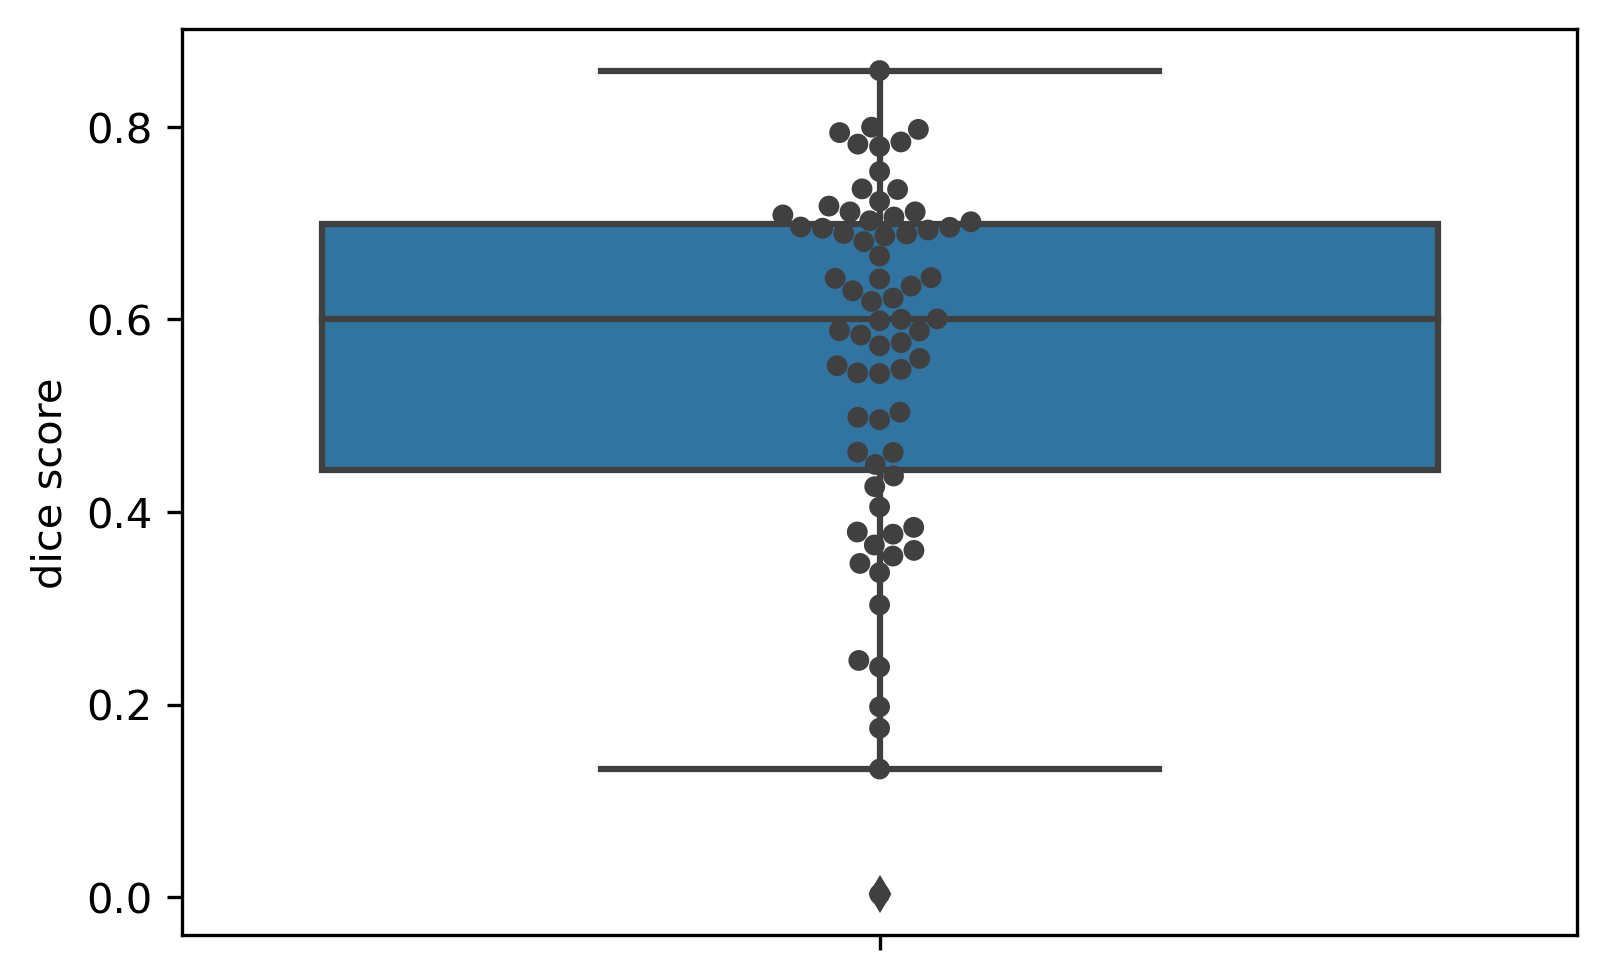

In [41]:
df = pd.DataFrame({'dice score':results})

plt.figure(dpi=300)
ax = sns.boxplot(y="dice score", data=df)
ax = sns.swarmplot(y="dice score", data=df, color=".25")
# ax.grid("on")

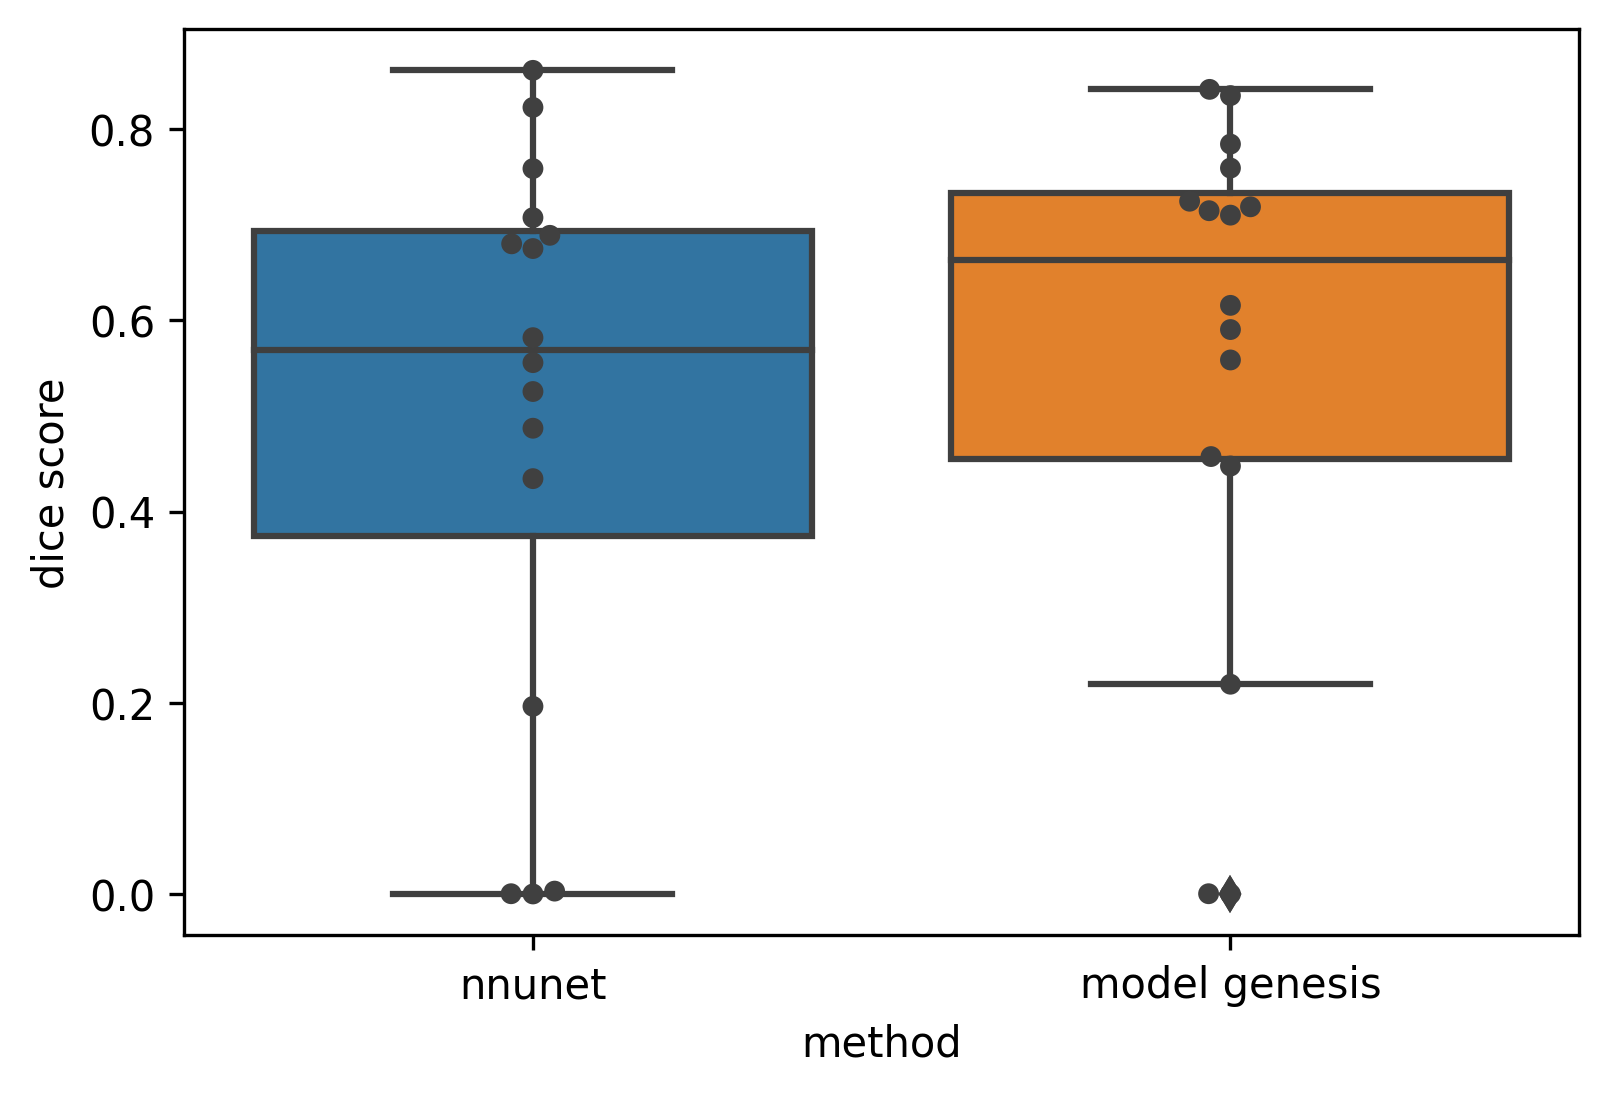

In [178]:
method=['nnunet']*len(nnunet_results)+['model genesis']*len(results)
dice=np.concatenate((nnunet_results,results))
df = pd.DataFrame({'dice score':dice, 'method':method})

plt.figure(dpi=300)
ax = sns.boxplot(x='method', y="dice score", data=df)
ax = sns.swarmplot(x='method', y="dice score", data=df, color=".25")

## visualization

visualize the segmentations results with napari
it has been made interactive with the following keybindings:

'n' for next image

'b' for previous image

'p' to display properties

In [34]:
# tiff utils
def tif_read_meta(tif_path, display=False):
    """
    read the metadata of a tif file and stores them in a python dict.
    if there is a 'ImageDescription' tag, it transforms it as a dictionary
    """
    meta = {}
    with tiff.TiffFile(tif_path) as tif:
        for page in tif.pages:
            for tag in page.tags:
                tag_name, tag_value = tag.name, tag.value
                if display: print(tag.name, tag.code, tag.dtype, tag.count, tag.value)

                # below; fix storage problem for ImageDescription tag
                if tag_name == 'ImageDescription': 
                    list_desc = tag_value.split('\n')
                    dict_desc = {}
                    for idx, elm in enumerate(list_desc):
                        split = elm.split('=')
                        dict_desc[split[0]] = split[1]
                    meta[tag_name] = dict_desc
                else:
                    meta[tag_name] = tag_value
            break # just check the first image
    return meta

def tif_get_spacing(path):
    """
    get the image spacing stored in the metadata file.
    """
    img_meta = tif_read_meta(path)

    xres = (img_meta["XResolution"][1]/img_meta["XResolution"][0])*1e-6
    yres = (img_meta["YResolution"][1]/img_meta["YResolution"][0])*1e-6
    zres = float(img_meta["ImageDescription"]["spacing"])*1e-6
    max_dim = min([xres,yres,zres])
    xres = max_dim / xres
    yres = max_dim / yres
    zres = max_dim / zres
    return (xres, yres, zres)

def load_resample_img(path, spacing):
    """
    load and resample the image 
    """
    transform = tio.Resample(spacing)
    img = imread(path)
    timg = np.expand_dims(img, 0)
    return transform(timg)[0]

In [ ]:
idx = 0
# name_dict = {
#     'image'    :-1,
#     'sophie'   :0,
#     'guillaume':1,
#     'gift'     :2,
#     'otsu'     :3,
# }
name_dict = dict(zip(["image"]+list_names, [-1]+[i for i in range(len(list_names))]))
fct = iou # metric to display
# spacing = tif_get_spacing(list_abs[-1][idx])
# spacing = np.flip(spacing) # CAREFUL: spacing must be in ZYX and not in XYZ!
spacing = [1,1,1]
# load_fct = lambda v,idx,spacing: load_resample_img(list_abs[v][idx], spacing)
# def load_fct(v,idx,spacing):
#     img = load_resample_img(list_abs[v][idx], spacing)
#     img = (img - img.min()) / (img.max() - img.min())
#     return img
load_fct = lambda v,idx,spacing: sitk_imread(list_abs[v][idx])
# load_fct_lab = lambda v,idx,spacing: load_resample_img(list_abs[v][idx], spacing)//255 * (1+v)
load_fct_lab = lambda v,idx,spacing: adaptive_imread(list_abs[v][idx])


viewer = napari.Viewer()

for k,v in name_dict.items():
    if k=='image':
        
        viewer.add_image(load_fct(v,idx,spacing), name=k)
    else: # change color properties
        viewer.add_labels(load_fct_lab(v,idx,spacing), name=k)

def replace_layers(viewer):
    global idx
    for k, v in name_dict.items():
        if k=='image':
            viewer.layers[k].data = load_fct(v,idx,spacing)
        else: # change color properties
            viewer.layers[k].data = load_fct_lab(v,idx,spacing)
    return viewer
    
@viewer.bind_key('n', overwrite=True)
def napari_print_next(viewer):
    global idx
    if idx < len(list_abs[0])-1:
        idx += 1
        viewer = replace_layers(viewer)

@viewer.bind_key('b', overwrite=True)
def napari_print_previous(viewer):
    global idx
    if idx > 0:
        idx -= 1
        viewer = replace_layers(viewer)
        
@viewer.bind_key('p', overwrite=True)
def napari_print_properties(viewer):
    global idx
    print("current idx: ", idx)
    print("image name: ", list_abs[0][idx].split('/')[-1])
    versus_all(versus_one, fct, np.transpose(list_abs)[idx])
    
@viewer.bind_key('d', overwrite=True)
def napari_delete_img_msk(viewer):
    global idx
    print("current idx: ", idx)
    for j in range(len(list_abs)):
        print("remove: ", list_abs[j][idx])
        os.remove(list_abs[j][idx])
        list_abs[j].remove(list_abs[j][idx])

    


In [20]:
# path_pancreas = '/home/gumougeot/all/data/Task07_Pancreas/tif_test_img_labels/pancreas_001.tif'
# path_nucleus = '/home/gumougeot/all/data/3d_nucleus/all_manual/masks_resampled_sophie/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_O1_1_C0.tif'

# img_pancreas = imread(path_pancreas)
# img_nucleus = imread(path_nucleus)

# print(np.max(img_pancreas))
# print(np.max(img_nucleus))

## visualize without napari

In [21]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def get_js_video(images, channel=-1, cmap='jet',
                 vmin=0, vmax=0, interval=200, repeat_delay=1000):
    """Create a JavaScript video as HTML for visualizing 3D data as a movie.

    Args:
        images (numpy.array): images to display as video
        channel (int): channel index to plot
        vmin (int): lower end of data range covered by colormap
        vmax (int): upper end of data range covered by colormap

    Returns:
        str: JS HTML to display video
    """
    fig = plt.figure()

    ims = []
    plot_kwargs = {
        'animated': True,
        'cmap': cmap,
    }

    if vmax == 0:
        vmax = images.max()

    # TODO: do these not work for other cmaps?
    if cmap == 'cubehelix' or cmap == 'jet':
        plot_kwargs['vmin'] = vmin
        plot_kwargs['vmax'] = vmax

    for i in range(images.shape[0]):
        im = plt.imshow(images[i, :, :, channel], **plot_kwargs)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=interval, repeat_delay=repeat_delay)
    plt.close()
    return ani.to_jshtml()

def load_fct(v,idx,spacing):
    print("img name:", list_abs[v][idx])
    img = load_resample_img(list_abs[v][idx], spacing)
    img = (img - img.min()) / (img.max() - img.min())
    return np.expand_dims(img,-1)

img = load_fct(2,-2,(1,1,1))
# img is a 4 dimensional array (x,y,z,channel)
print(img.shape)
HTML(get_js_video(img))

img name: /home/gumougeot/all/data/3d_nucleus/remi/img/Z0220405_48h_24h_+HIRA_cot_A_4_1433.tif
(59, 116, 106, 1)


In [22]:
list_abs[0][-2]

'/home/gumougeot/all/data/3d_nucleus/remi/pred/Z0220405_48h_24h_+HIRA_cot_A_4_1433.tif'

img name: /home/gumougeot/all/data/3d_nucleus/remi/img/Z022_48h_24h_8T_cotB_4_01.tif
img name: /home/gumougeot/all/data/3d_nucleus/remi/img/Z022_48h_24h_8T_cotB_3_45.tif
current idx:  2
image name:  Z022_48h_24h_8T_cotB_3_45.tif
lab_1 vs lab_0: 0.7250169952413325
